In [2]:
import sys
sys.path.insert(0,"/home/nico/Tools/petsc-3.12.5/lib/petsc/bin/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_SigmoidProcessing import *
import pandas as pd
from matplotlib.gridspec import GridSpec

In [3]:
# Save into a class the 
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax

    
def GenericFigAxis():
    fig = plt.figure(figsize=[15,5])
    gs = GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]
    
def format_axes(fig):
    """
    Format a figure and 4 equidistant reveivers' lines from a single file. Receiver distance defines the color.
    """
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
        
    Lines = fig.axes[-1].get_lines()
    
    legend2 = fig.axes[-1].legend(Lines, ['2km','4km', '6km', '8km'], loc=1)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")

def Multi_format_axes(fig,cmap, LabelsPerColor):
    """
    Format a figure that contains different files with 
    information from several receivers for simulations under sets of blending parameters.
    """
    ColorDict = dict(enumerate(LabelsPerColor)) 
    
    
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
    Lines = []
    for idx,colcol in enumerate(cmap.colors):
        Lines.append(mlines.Line2D([], [], color = colcol,
                     linewidth = 3, label = ColorDict.get(idx)))
    
    legend2 = fig.axes[-1].legend(Lines, LabelsPerColor, loc = 2)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")
    
    

In [4]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

In [29]:

from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.scientific.sequential import Oslo_5

cmap = ListedColormap(Oslo_5.mpl_colors[:])

In [44]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210730-Tilting/"
TiltedFile25 = LoadPickleFile(Filename = "Tilt20deg_025x025_P1-TPList_t2260_d25.025.pickle",FolderPath = FolderTiltedPath)
TiltedFile50 = LoadPickleFile(Filename = "Tilt20deg_050x050_P1-TPList_t1130_d50.05.pickle",FolderPath = FolderTiltedPath)
TiltedFile100 = LoadPickleFile(Filename = "Tilt20deg_100x100_P1-TPList_t565_d100.1.pickle",FolderPath = FolderTiltedPath)



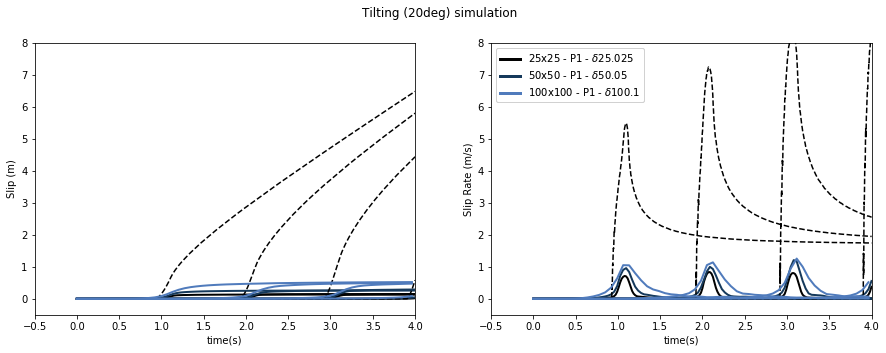

In [46]:
fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for Test1 in TiltedFile25[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 1    
for Test1 in TiltedFile50[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 2   
for Test1 in TiltedFile100[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
LabelsPerColor= ["25x25 - P1 - $\delta$25.025", "50x50 - P1 - $\delta$50.05", "100x100 - P1 - $\delta$100.1"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilting (20deg) simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

Tilting 20 deg. 

$25X25m$, $50X50m$, $100X100m$  simulation, P1, $\delta/dy = 1.001$

Very small amplitude, No CG projection added.
Init_v3 used

In [49]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210730-Tilting/"
TiltedFile25CGBlend = LoadPickleFile(Filename = "Tilt20deg_025x025_P1_CGnBlend-TPList_t2260_d25.025.pickle",FolderPath = FolderTiltedPath)
TiltedFile50CGBlend = LoadPickleFile(Filename = "Tilt20deg_050x050_P1_CGnBlend-TPList_t1130_d50.05.pickle",FolderPath = FolderTiltedPath)
TiltedFile100CGBlend = LoadPickleFile(Filename = "Tilt20deg_100x100_P1_CGnBlend-TPList_t565_d100.1.pickle",FolderPath = FolderTiltedPath)



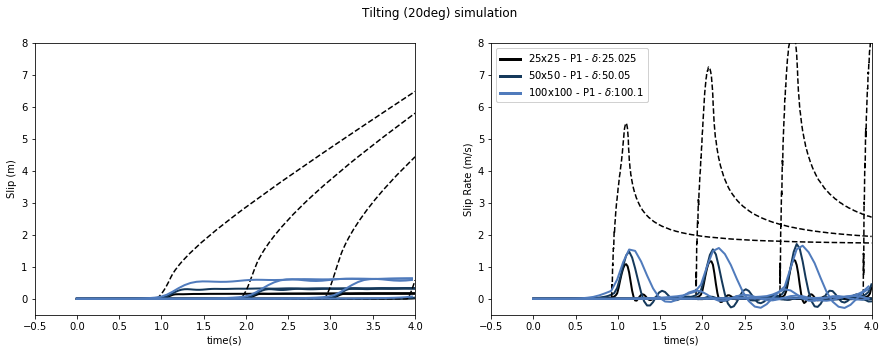

In [52]:
fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for Test1 in TiltedFile25CGBlend[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1    
for Test1 in TiltedFile50CGBlend[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 2   
for Test1 in TiltedFile100CGBlend[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
LabelsPerColor= ["25x25 - P1 - $\delta$:25.025", 
                 "50x50 - P1 - $\delta$:50.05", 
                 "100x100 - P1 - $\delta$:100.1"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilting (20deg) simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

Tilting 20 deg. 

$25X25m$, $50X50m$, $100X100m$  simulation, P1, $\delta/dy = 1.001$

$A:12/\delta;\ \phi_o:0.65\delta$

Very small amplitude, Single CG projection added on the first position.
Init_v3 used

In [61]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210730-Tilting/"
TiltedFile25CGBlend_A3p = LoadPickleFile(Filename = "Tilt20deg_025x025_P1_CGnBlend-PdepBlend-TPList_t2260_d25.025.pickle",FolderPath = FolderTiltedPath)
TiltedFile50CGBlend_A3p = LoadPickleFile(Filename = "Tilt20deg_050x050_P1_CGnBlend-PdepBlend-TPList_t1130_d50.05.pickle",FolderPath = FolderTiltedPath)
TiltedFile100CGBlend_A3p = LoadPickleFile(Filename = "Tilt20deg_100x100_P1_CGnBlend-PdepBlend-TPList_t565_d100.1.pickle",FolderPath = FolderTiltedPath)



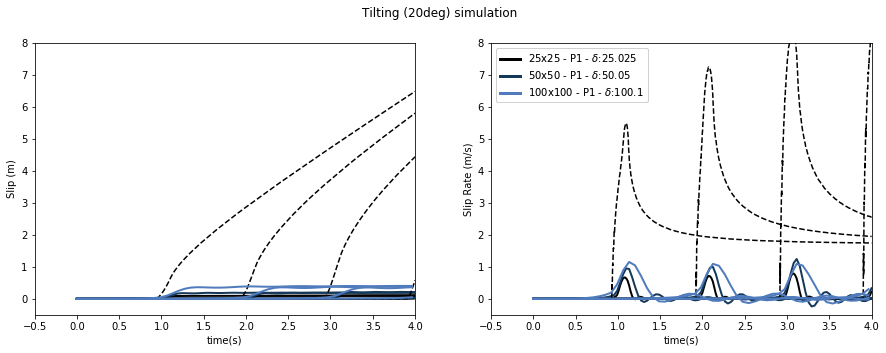

In [62]:
fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for Test1 in TiltedFile25CGBlend_A3p[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 1    
for Test1 in TiltedFile50CGBlend_A3p[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 2   
for Test1 in TiltedFile100CGBlend_A3p[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
LabelsPerColor= ["25x25 - P1 - $\delta$:25.025", 
                 "50x50 - P1 - $\delta$:50.05", 
                 "100x100 - P1 - $\delta$:100.1"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilting (20deg) simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

Tilting 20 deg. 

$25X25m$, $50X50m$, $100X100m$  simulation, P1, $\delta/dy = 1.001$

$A:3p/\delta;\ \phi_o:0.65\delta$

Very small amplitude, Single CG projection added on the first position.
Init_v3 used

# Constant distance delta, single CG proj, blending, A=3p/delta

In [63]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210730-Tilting/"
TiltedFile25CGBlend_A3p_100delta = LoadPickleFile(Filename = "P3_P1_025x025_Dg-PdepBlend-TPList_t2260_d100.pickle",FolderPath = FolderTiltedPath)
TiltedFile50CGBlend_A3p_100delta = LoadPickleFile(Filename = "P2_P1_050x050_Dg-PdepBlend-TPList_t1130_d100.pickle",FolderPath = FolderTiltedPath)
TiltedFile100CGBlend_A3p_100delta = LoadPickleFile(Filename = "P1_P1_100x100_Dg-PdepBlend-TPList_t560_d100.pickle",FolderPath = FolderTiltedPath)



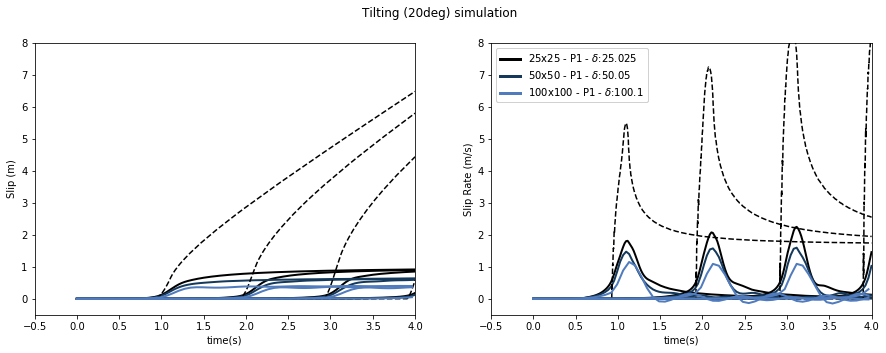

In [64]:
fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for Test1 in TiltedFile25CGBlend_A3p_100delta[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 1    
for Test1 in TiltedFile50CGBlend_A3p_100delta[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

iidx = 2   
for Test1 in TiltedFile100CGBlend_A3p_100delta[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
LabelsPerColor= ["25x25 - P1 - $\delta$:25.025", 
                 "50x50 - P1 - $\delta$:50.05", 
                 "100x100 - P1 - $\delta$:100.1"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilting (20deg) simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

In [65]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210730-Tilting/"

TiltedFile100CGBlend_A3p_100deltaP1 = LoadPickleFile(Filename = "P6_P3_100x100_Dg-PdepBlend-TPList_t2040_d100.pickle",FolderPath = FolderTiltedPath)


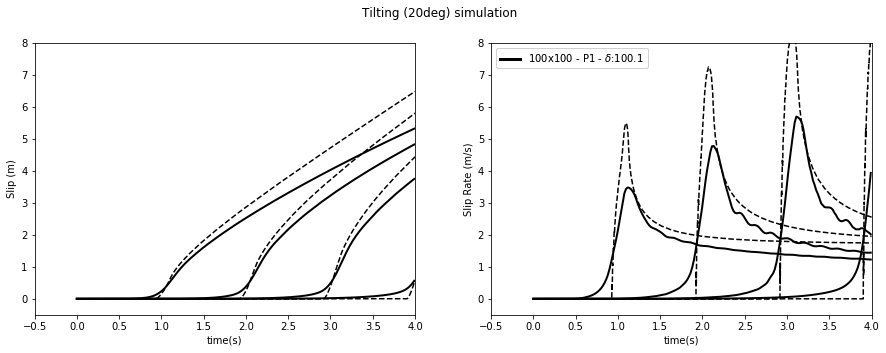

In [66]:
fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for Test1 in TiltedFile100CGBlend_A3p_100deltaP1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


LabelsPerColor= [
                 "100x100 - P1 - $\delta$:100.1"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilting (20deg) simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]